In [2]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

# 2D turbulence in eddy model

In [3]:
eddy_model = pyqg.QGModel(nx=256, dt=1800, tmax=311040000.0, twrite=10000, tavestart=155520000.0, beta=0) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [4]:
# From here, you can call .run() to run a new simulation
eddy_model.run()

# Convert to xarray Datasets
eddy_model_highRes = eddy_model.to_dataset()

INFO: Step: 10000, Time: 1.80e+07, KE: 6.88e-07, CFL: 0.012
INFO: Step: 20000, Time: 3.60e+07, KE: 2.18e-05, CFL: 0.013
INFO: Step: 30000, Time: 5.40e+07, KE: 1.02e-03, CFL: 0.095
INFO: Step: 40000, Time: 7.20e+07, KE: 2.24e-03, CFL: 0.238
INFO: Step: 50000, Time: 9.00e+07, KE: 1.77e-03, CFL: 0.169
INFO: Step: 60000, Time: 1.08e+08, KE: 1.66e-03, CFL: 0.178
INFO: Step: 70000, Time: 1.26e+08, KE: 1.57e-03, CFL: 0.183
INFO: Step: 80000, Time: 1.44e+08, KE: 1.79e-03, CFL: 0.239
INFO: Step: 90000, Time: 1.62e+08, KE: 1.75e-03, CFL: 0.191
INFO: Step: 100000, Time: 1.80e+08, KE: 1.81e-03, CFL: 0.281
INFO: Step: 110000, Time: 1.98e+08, KE: 1.84e-03, CFL: 0.205
INFO: Step: 120000, Time: 2.16e+08, KE: 1.77e-03, CFL: 0.190
INFO: Step: 130000, Time: 2.34e+08, KE: 1.74e-03, CFL: 0.183
INFO: Step: 140000, Time: 2.52e+08, KE: 1.88e-03, CFL: 0.184
INFO: Step: 150000, Time: 2.70e+08, KE: 1.97e-03, CFL: 0.197
INFO: Step: 160000, Time: 2.88e+08, KE: 1.97e-03, CFL: 0.202
INFO: Step: 170000, Time: 3.06e+0

In [5]:
import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
eddy_model_highRes.to_zarr(f'{SCRATCH_BUCKET}/eddy_model_highRes.zarr')  # write data

In [6]:
def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

eddy_model_highRes = generate_snapshots(eddy_model)
eddy_model_highRes

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 256, x: 256, l: 256, k: 129,
                        lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
  * y                  (y) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.000798 0.0008042
Data variables: (12/32)
    q                  (time, lev, y, x) float64 -3.786e-07 ... 9.363e-07
    u                  (time, lev, y, x) float64 0.02234 0.02648 ... -0.006801
    v                  (time, lev, y, x) float64 0.03087 0.02545 ... 0.001861
    ufull              (time, lev, y, x) float64 0.04734 0.05148 ... -0.006801
    vfull              (time, lev, y, x) float64 0.03087 0.02545 ... 0.001861
    qh                 (time, lev, l, k) complex128 (0.038893083143345414+0j)...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 6.97e-21 ... 1.358e-63 3.266e-66
    ENSfrictionspec    (time, l, k) float64 0.0 -3.887e-23 ... -2.3e-63
    APEgenspec         (time, l, k) float64 0.0 1.568e-12 ... 7.349e-58
    APEflux            (time, l, k) float64 -0.0 -1.533e-12 ... 2.48e-38
    KEflux             (time, l, k) float64 0.0 1.862e-13 ... 1.104e-34
    APEgen             (time) float64 3.959e-10
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         172800
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

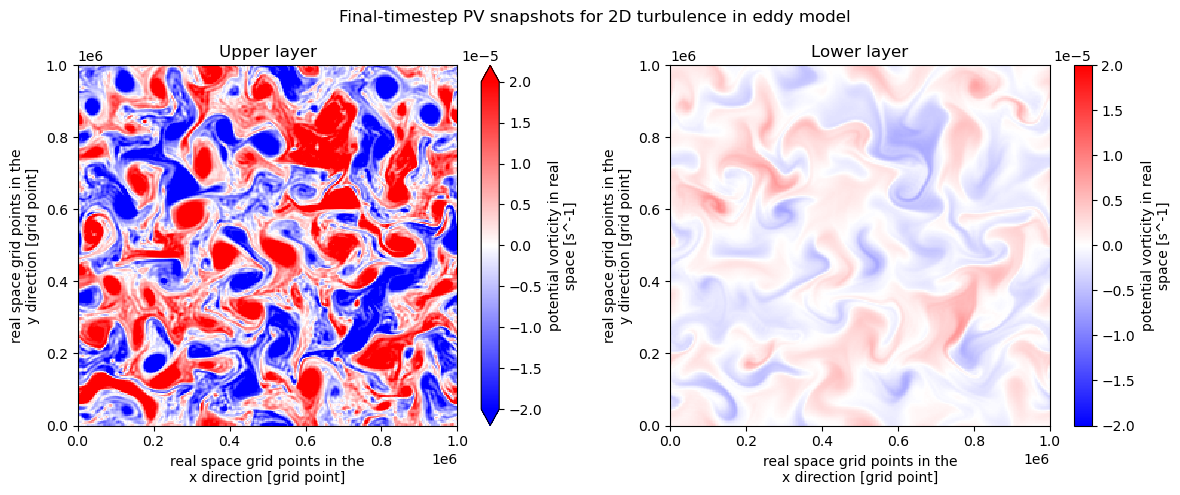

In [7]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep PV snapshots for 2D turbulence in eddy model")
plt.subplot(121); eddy_model_highRes.q.isel(lev=0, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title("Upper layer")
plt.subplot(122); eddy_model_highRes.q.isel(lev=1, time=-1).plot(vmin=-2e-5, vmax=2e-5, cmap='bwr'); plt.title( "Lower layer")
plt.tight_layout()

## Coarsening data

In [8]:
import pyqg_parameterization_benchmarks.coarsening_ops as coarsening

In [14]:
op1 = coarsening.Operator1(eddy_model, 64)
op1.m2.to_dataset()

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


<xarray.Dataset>
Dimensions:  (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time     (time) float64 0.0
  * lev      (lev) int64 1 2
  * lev_mid  (lev_mid) float64 1.5
  * x        (x) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * y        (y) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * l        (l) float64 0.0 6.283e-06 1.257e-05 ... -1.257e-05 -6.283e-06
  * k        (k) float64 0.0 6.283e-06 1.257e-05 ... 0.0001948 0.0002011
Data variables: (12/14)
    q        (time, lev, y, x) float64 1.782e-07 -2.693e-06 ... 9.223e-07
    u        (time, lev, y, x) float64 0.01653 0.02126 ... -0.008761 -0.01091
    v        (time, lev, y, x) float64 0.03152 0.02432 ... -0.006199 -0.002211
    ufull    (time, lev, y, x) float64 0.04153 0.04626 ... -0.008761 -0.01091
    vfull    (time, lev, y, x) float64 0.03152 0.02432 ... -0.006199 -0.002211
    qh       (time, lev, l, k) complex128 (0.002430817696459089+0j) ... (-1.1...
    ...       ...
    ph       (time, lev, l, k) complex128 0j ... (2.8583029407592716e-13+4.64...
    dqhdt    (time, lev, l, k) complex128 0j 0j 0j 0j 0j 0j ... 0j 0j 0j 0j 0j
    Ubg      (lev) float64 0.025 0.0
    Qy       (lev) float64 8.889e-11 -2.222e-11
    dqdt     (time, lev, y, x) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    p        (time, lev, y, x) float64 564.5 1.042e+03 ... -549.5 -619.4
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [15]:
# Helper function to display plots
def imshow(arr, vlim=3e-5):
    plt.xticks([]); plt.yticks([])
    return plt.imshow(arr, vmin=-vlim, vmax=vlim, cmap='bwr', interpolation='none')

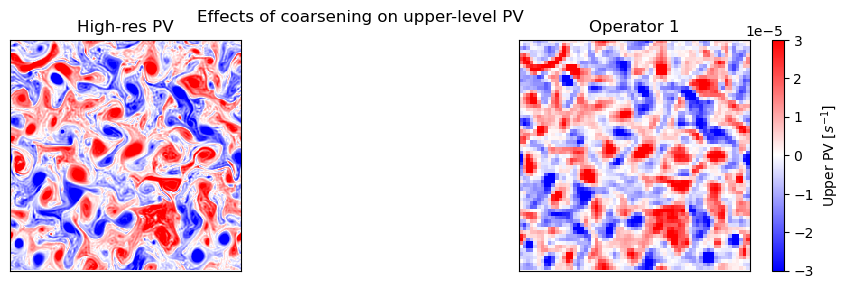

In [41]:
# Visualizing effects on upper-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on upper-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(eddy_model.q[0])
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[0])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

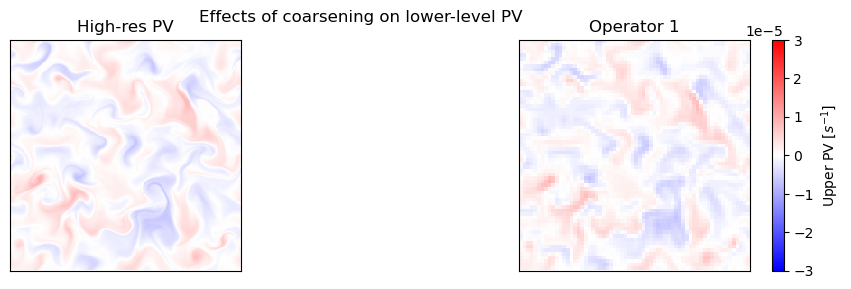

In [40]:
# Visualizing effects on lower-level PV
fig = plt.figure(figsize=(14.5,3))
plt.suptitle('Effects of coarsening on lower-level PV')
plt.subplot(1,2,1, title='High-res PV')
imshow(eddy_model.q[1])
plt.subplot(1,2,2, title='Operator 1')
im = imshow(op1.m2.q[1])
fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('Upper PV [$s^{-1}$]')

Text(0.5, 0.98, 'Effects on upper PV forcing term')

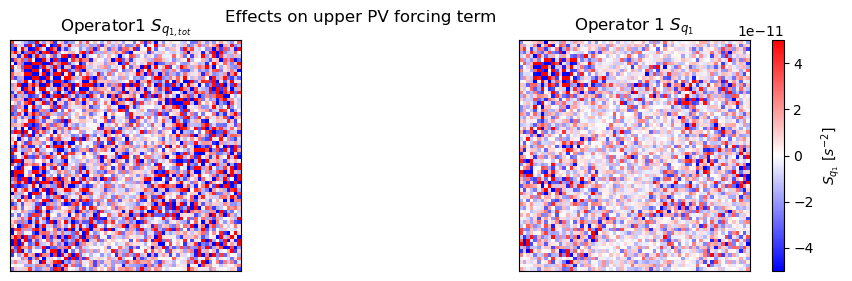

In [38]:
# Visualizing effects on upper PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[0], 3e-11)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[0], 5e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on upper PV forcing term')

Text(0.5, 0.98, 'Effects on lower PV forcing term')

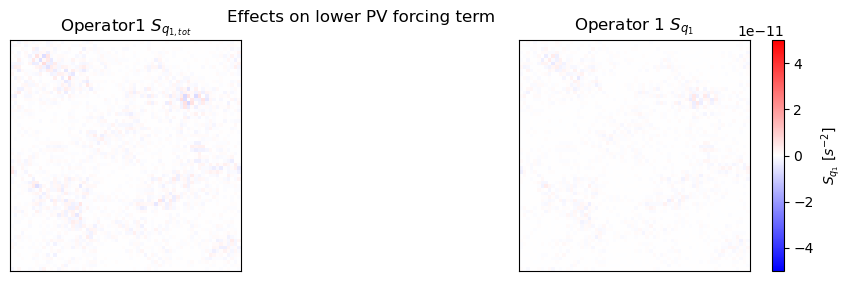

In [44]:
# Visualizing effects on lower PV forcing term
fig = plt.figure(figsize=(14.5,3))
plt.subplot(1,2,1, title='Operator1 $S_{q_{1,tot}}$')
imshow(op1.q_forcing_total[1], 3e-11)
plt.subplot(1,2,2, title='Operator 1' + " $S_{q_1}$")
im = imshow(op1.subgrid_forcing('q')[1], 5e-11)
cb = fig.colorbar(im, ax=fig.axes, pad=0.02).set_label('$S_{q_1}$ [$s^{-2}$]')
plt.suptitle('Effects on lower PV forcing term')

## Train FCNN on this data

In [49]:
from pyqg_parameterization_benchmarks.neural_networks import FCNNParameterization, FullyCNN

In [75]:
training_ds = op1.m2.to_dataset()
q_subs = op1.subgrid_forcing('q')
training_dss = training_ds.assign(q_subgrid_forcing=training_ds['dqdt'] * 0 + q_subs)
training_dss

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 0.0
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/15)
    q                  (time, lev, y, x) float64 1.782e-07 ... 9.223e-07
    u                  (time, lev, y, x) float64 0.01653 0.02126 ... -0.01091
    v                  (time, lev, y, x) float64 0.03152 0.02432 ... -0.002211
    ufull              (time, lev, y, x) float64 0.04153 0.04626 ... -0.01091
    vfull              (time, lev, y, x) float64 0.03152 0.02432 ... -0.002211
    qh                 (time, lev, l, k) complex128 (0.002430817696459089+0j)...
    ...                 ...
    dqhdt              (time, lev, l, k) complex128 (-0-0j) ... (3.4499572876...
    Ubg                (lev) float64 0.025 0.0
    Qy                 (lev) float64 8.889e-11 -2.222e-11
    dqdt               (time, lev, y, x) float64 -1.712e-11 ... 4.281e-13
    p                  (time, lev, y, x) float64 564.5 1.042e+03 ... -619.4
    q_subgrid_forcing  (time, lev, y, x) float64 -2.381e-11 ... 3.371e-13
Attributes: (12/23)
    pyqg:beta:       0
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         1800.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       1576800000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [67]:
param = FCNNParameterization.train_on(training_ds, '/home/jovyan/pyqg_parameterization_benchmarks/testing/eddy_2Dturb',
                                      inputs=['q', 'u', 'v'], 
                                      targets = ['q_subgrid_forcing']) 

ValueError: could not interpret q_subgrid_forcing